Text(0.5, 1.0, 'Тепловая карта заболеваемости')

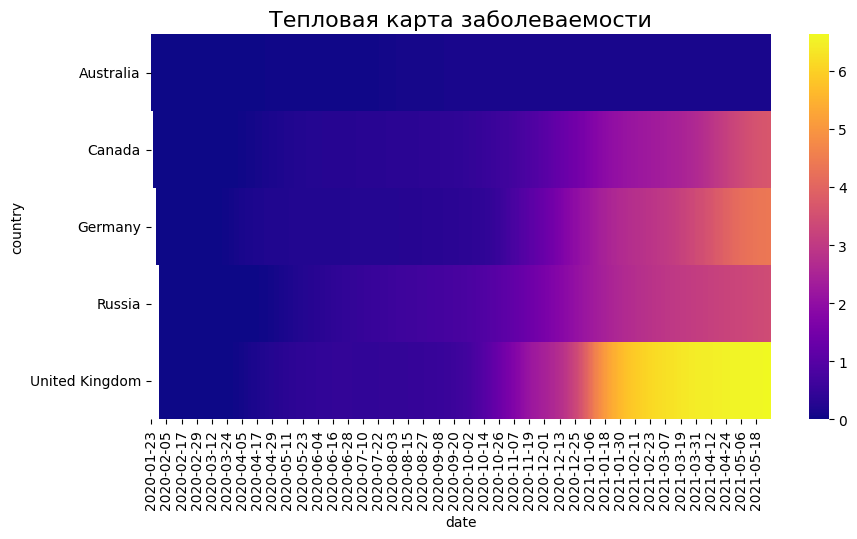

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
covid_data = pd.read_csv('covid_data.csv')
vaccine = pd.read_csv('country_vaccinations.csv')
vaccine = vaccine[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
covid_data = covid_data.groupby(['date','country'],as_index = False)[['confirmed','deaths','recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed']-covid_data['deaths']-covid_data['recovered']
covid_data = covid_data.sort_values(by=['country','date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccine['date'] = pd.to_datetime(vaccine['date'])
covid_df = covid_data.merge(vaccine,on = ['date','country'], how = 'left')
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)